In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('mlia0425_A1_CleanDataset.csv')
df2 = pd.read_csv('mlia0425_A1_CleanDataset.csv')

In [ ]:
print(df.shape)
print(list(df.columns))

(88592, 31)
['Unnamed: 0', 'Record_ID', 'Customer_ID', 'Record_Month', 'Customer_Age', 'Customer_SSN', 'Customer_Occupation', 'Annual_Income', 'Monthly_Salary', 'Bank_Accounts', 'Credit_Cards', 'Interest_Rate', 'Loans', 'Loan_Types', 'Extra_Column_1', 'Extra_Column_2', 'Extra_Column_3', 'Payment_Delay_Days', 'Delayed_Payments', 'Credit_Limit_Changes', 'Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization', 'Credit_History_Age', 'Min_Amount_Payment', 'Monthly_EMI', 'Monthly_Investment', 'Payment_Behavior', 'Monthly_Balance', 'Credit_Score']


In [ ]:
def duration_to_decimal(duration):
    # Split the string to extract years and months
    parts = duration.split(' and ')
    years = int(parts[0].split(' ')[0])  # Get the number of years
    months = int(parts[1].split(' ')[0])  # Get the number of months

    # Convert months to a fraction of a year
    decimal_months = months / 12

    # Return the total in decimal years
    return years + decimal_months

# Example usage
df['Credit_History_Age'] = df['Credit_History_Age'].apply(duration_to_decimal)


<Axes: xlabel='Credit_Score'>

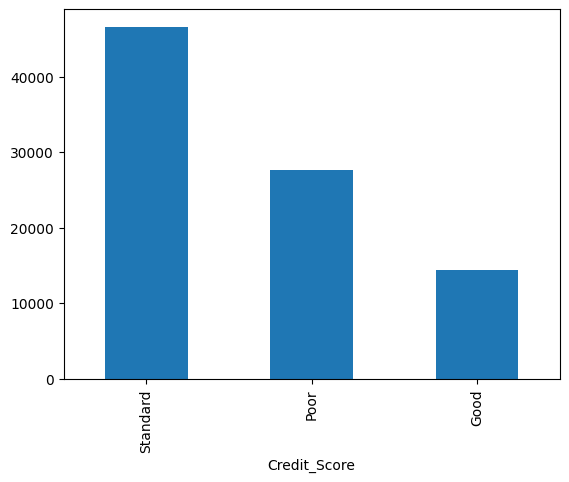

In [ ]:
df.Credit_Score.value_counts().plot(kind = 'bar')


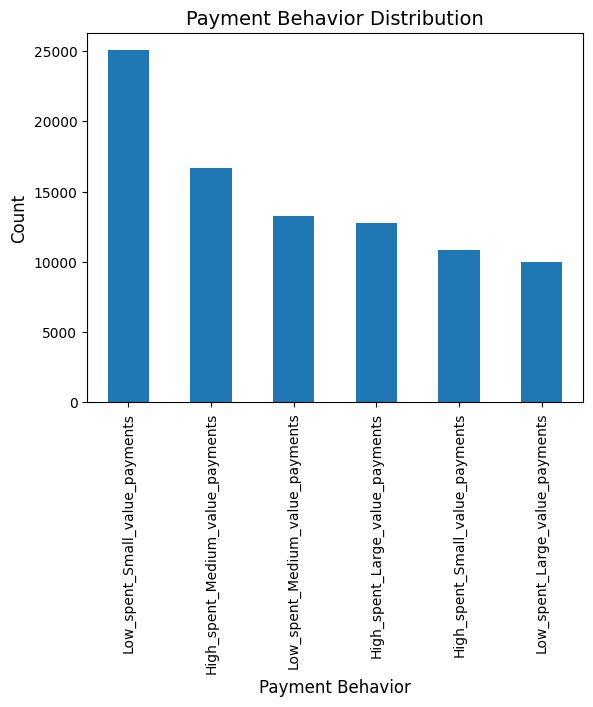

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Create the bar plot with value counts
df.Payment_Behavior.value_counts().plot(kind='bar')

# Add labels and title
plt.title('Payment Behavior Distribution', fontsize=14)
plt.xlabel('Payment Behavior', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.figure(figsize=(10, 6))  # Increase the width to 10 (or more as needed)
# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
print(df.isna().sum())  # Prints the number of NaN values in each column


Unnamed: 0                  0
Record_ID                   0
Customer_ID                 0
Record_Month                0
Customer_Age                0
Customer_SSN                0
Customer_Occupation         0
Annual_Income               5
Monthly_Salary              0
Bank_Accounts               0
Credit_Cards                0
Interest_Rate               0
Loans                       0
Loan_Types                  0
Extra_Column_1          11128
Extra_Column_2          26840
Extra_Column_3          42592
Payment_Delay_Days          0
Delayed_Payments            0
Credit_Limit_Changes        0
Credit_Inquiries            0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization          0
Credit_History_Age          0
Min_Amount_Payment          0
Monthly_EMI                 0
Monthly_Investment          0
Payment_Behavior            0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [ ]:
def show_heat_map(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="Spectral",
        fmt=".3f",
    )
    plt.title("Correlation Heatmap")

show_heat_map(df)

ValueError: could not convert string to float: '0x1602'

In [ ]:
# numerical features analysis

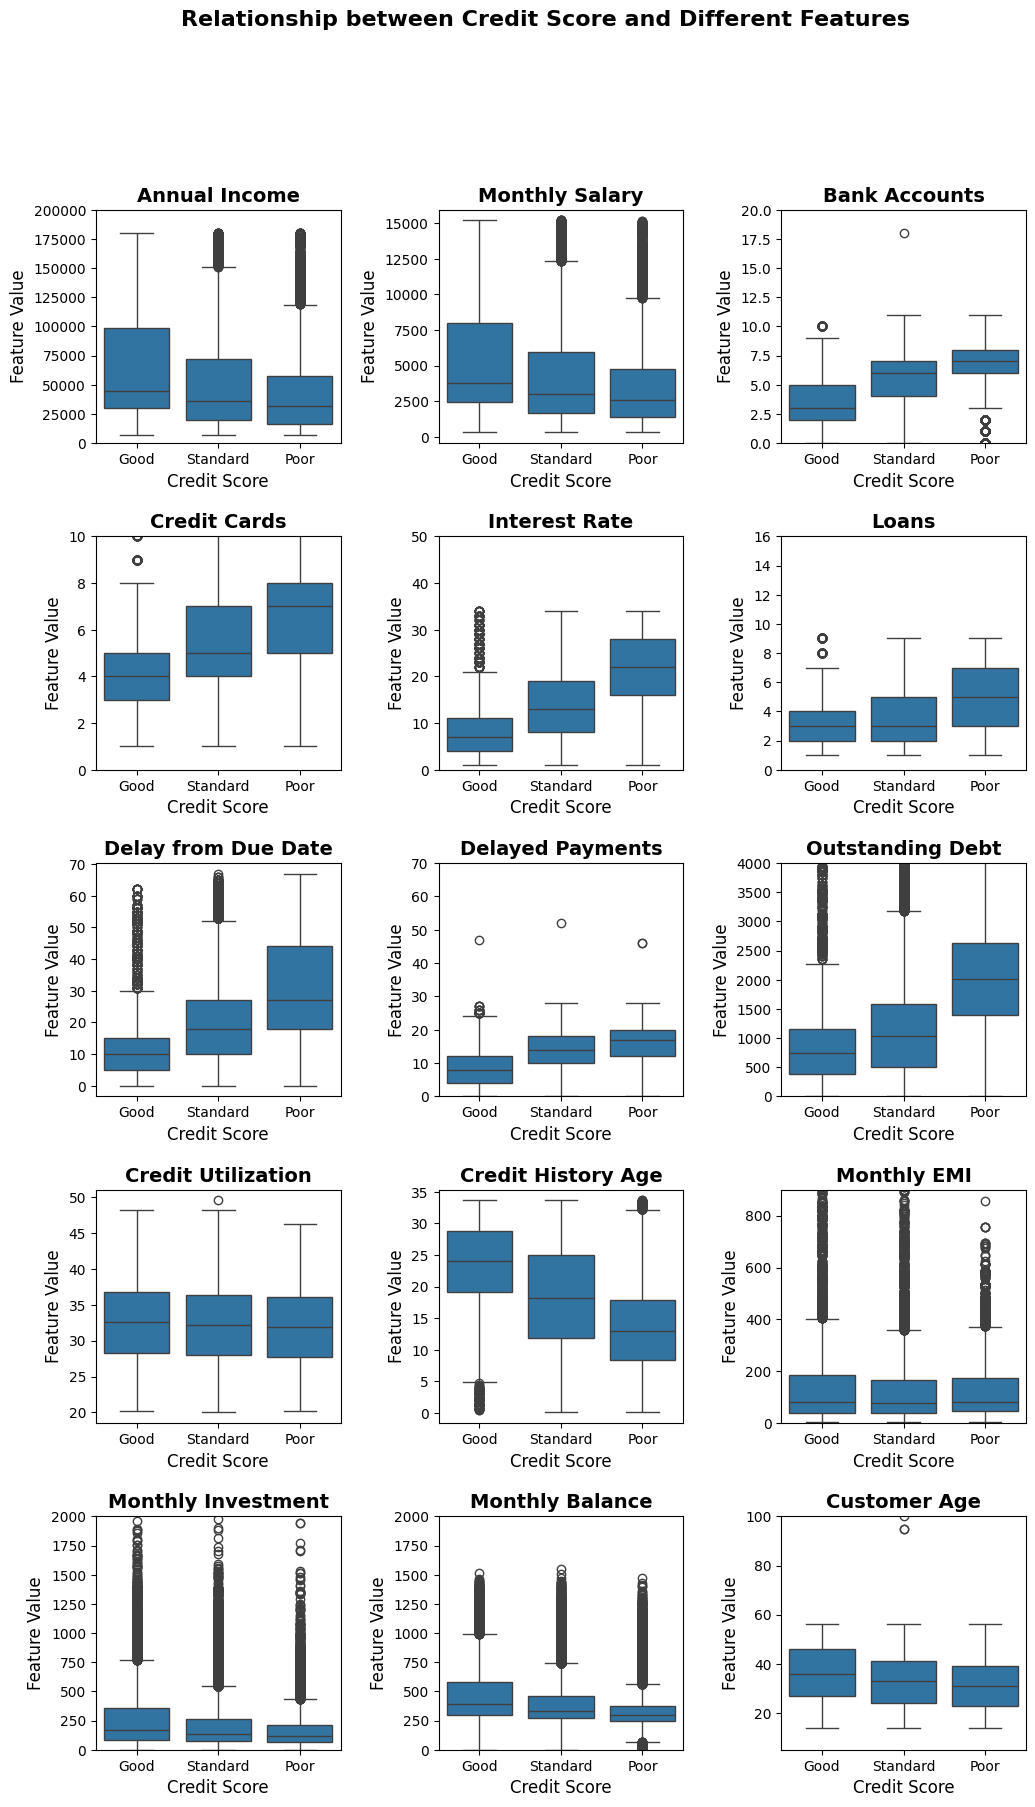

In [ ]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Plot multiple box plots on the same axis
sns.boxplot(x='Credit_Score', y='Annual_Income',  data=df, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Monthly_Salary', data=df, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Bank_Accounts', data=df, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Credit_Cards', data=df, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Loans', data=df, ax=ax[5])
sns.boxplot(x='Credit_Score', y='Payment_Delay_Days', data=df, ax=ax[6])
sns.boxplot(x='Credit_Score', y='Delayed_Payments', data=df, ax=ax[7])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, ax=ax[8])
sns.boxplot(x='Credit_Score', y='Credit_Utilization', data=df, ax=ax[9])
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, ax=ax[10])
sns.boxplot(x='Credit_Score', y='Monthly_EMI', data=df, ax=ax[11])
sns.boxplot(x='Credit_Score', y='Monthly_Investment', data=df, ax=ax[12])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, ax=ax[13])
sns.boxplot(x='Credit_Score', y='Customer_Age', data=df, ax=ax[14])

#set y axis

ax[0].set_ylim(0, 200000)  # Set limits from 5 to 100 for Customer_Age
ax[2].set_ylim(0, 20)  # Set limits from 5 to 100 for Customer_Age
ax[3].set_ylim(0, 10)  # Set limits from 5 to 100 for Customer_Age

ax[4].set_ylim(0, 50)  # Set limits from 0 to 30 for interest rates
ax[5].set_ylim(0, 16)  # Set limits for loan number
ax[7].set_ylim(0, 70)  # Set limits from 0 to 20 for interest rate
ax[8].set_ylim(0, 4000)  # Set limits from 0 to 4000 for outstanding debt
ax[11].set_ylim(0, 900)  # Set limits from 5 to 100 for Customer_Age

ax[12].set_ylim(0, 2000)  # Set limits from 5 to 100 for Customer_Age
ax[13].set_ylim(0, 2000)  # Set limits from 5 to 100 for Customer_Age
ax[14].set_ylim(5, 100)  # Set limits from 5 to 100 for Customer_Age


# Add a title and labels
#plt.title('Relationship between Credit Score and Different Features')
plt.xlabel('Credit Score')
plt.ylabel('Feature Value')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a white grid
for i in range(15):
    ax[i].grid(color='white', linestyle='-', linewidth=1, alpha=0.5)

# Add a title and labels
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')

# Set the font size for all subplot titles
titles = ['Annual Income', 'Monthly Salary', 'Bank Accounts', 'Credit Cards',
          'Interest Rate', 'Loans', 'Delay from Due Date', 'Delayed Payments',
          'Outstanding Debt', 'Credit Utilization', 'Credit History Age', 'Monthly EMI',
          'Monthly Investment', 'Monthly Balance', 'Customer Age']
for i in range(15):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

    # Set the font size for all x and y labels
for i in range(15):
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

# Show the plot
plt.show()



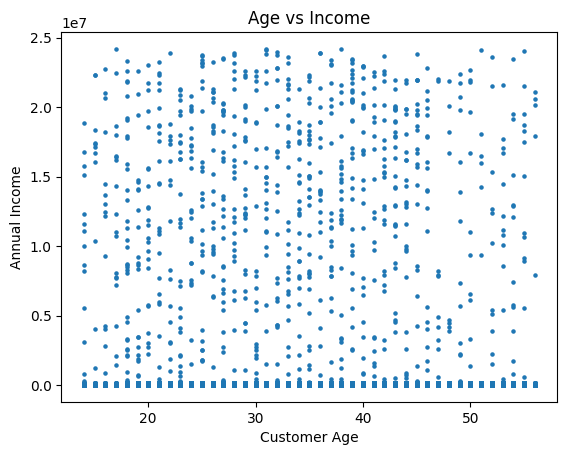

In [ ]:
data = df[['Customer_Age', 'Annual_Income']]

filtered_data = df[df['Customer_Age'] < 90][['Customer_Age', 'Annual_Income']]

# Sort the filtered data by Customer_Age
data_sorted = filtered_data.sort_values(by='Customer_Age')

plt.scatter(data_sorted['Customer_Age'], data_sorted['Annual_Income'], s=5)
plt.title('Age vs Income')
plt.xlabel('Customer Age')
plt.ylabel('Annual Income')
plt.show()

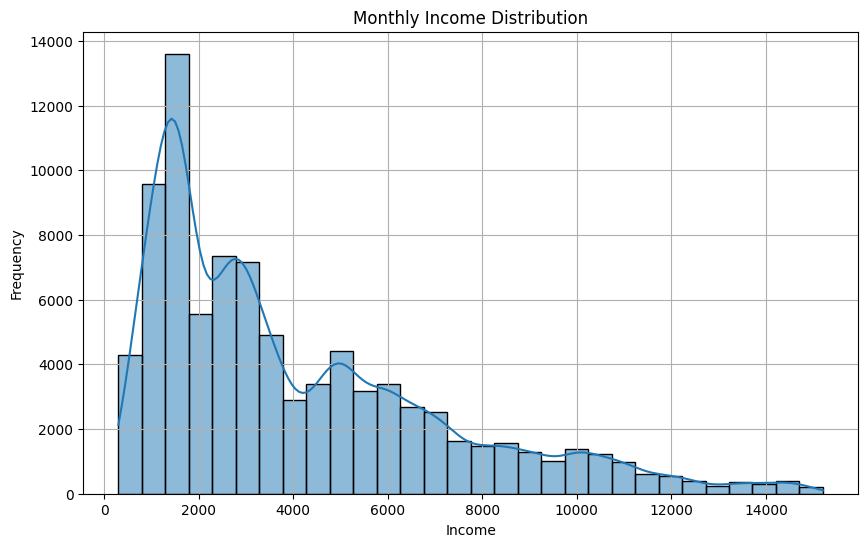

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'income' is your column for income data
# Replace with your actual DataFrame and column name
# For example: df = pd.read_csv('your_data.csv')

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly_Salary'], kde=True, bins=30)  # kde=True adds a smooth density curve
plt.title('Monthly Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
percentiles = df['Monthly_Salary'].quantile([0.25, 0.5, 0.75]).tolist()
print(percentiles)

[1582.092917, 3024.923333, 5781.146667]


In [ ]:
# Display summary statistics for Monthly_Salary
print(df2['Monthly_Salary'].describe())

# Check for unique values in Monthly_Salary
print(df2['Monthly_Salary'].unique())



count    88592.000000
mean      4068.857590
std       3119.980640
min        303.645417
25%       1582.092917
50%       3024.923333
75%       5781.146667
max      15204.633330
Name: Monthly_Salary, dtype: float64
[ 1824.843333  3037.986667 12187.22     ...  3097.008333  1929.906667
  3359.415833]


Monthly_Salary_category
Medium    22172
Ultra     22153
Low       22136
High      22131
Name: count, dtype: int64


<ipython-input-77-e949599b3613>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_credit_distribution = df2.groupby(['Monthly_Salary_category', 'Credit_Score']).size().reset_index(name='Count')


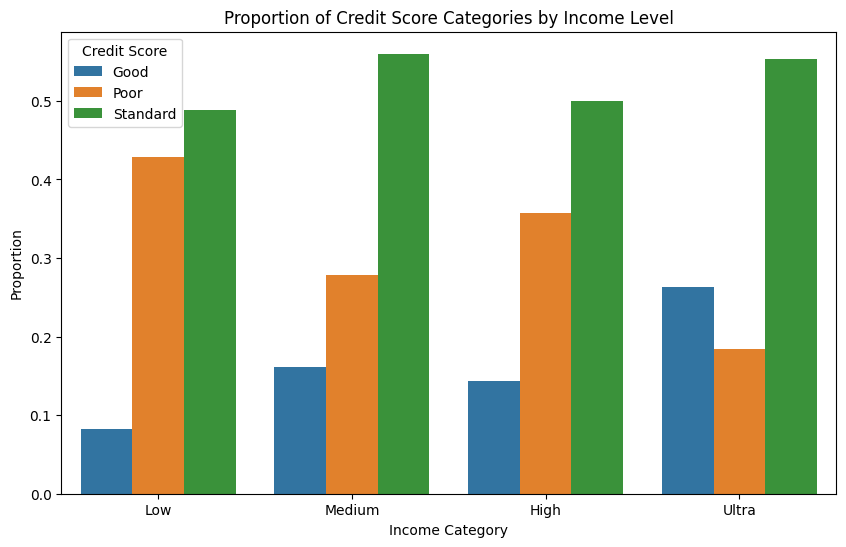

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Monthly_Salary to numeric and handle errors by coercing invalid data to NaN
df2['Monthly_Salary'] = pd.to_numeric(df2['Monthly_Salary'], errors='coerce')

# Convert Credit_Score to categorical if not already
df2['Credit_Score'] = df2['Credit_Score'].astype('category')

# Drop rows with missing Monthly_Salary or Credit_Score
df2 = df.dropna(subset=['Monthly_Salary', 'Credit_Score'])

# Bin Monthly_Salary into categories (adjust bins if necessary)
df2['Monthly_Salary_category'] = pd.cut(df2['Monthly_Salary'], bins=[0, 1582, 3025, 5781, 25000], labels=['Low', 'Medium', 'High', 'Ultra'])

# Check for empty bins
print(df2['Monthly_Salary_category'].value_counts())

# Calculate the proportions of credit score categories for each income category
income_credit_distribution = df2.groupby(['Monthly_Salary_category', 'Credit_Score']).size().reset_index(name='Count')

# Normalize to get proportions
income_credit_distribution['Proportion'] = income_credit_distribution.groupby('Monthly_Salary_category', observed=True)['Count'].transform(lambda x: x / x.sum())

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Monthly_Salary_category', y='Proportion', hue='Credit_Score', data=income_credit_distribution)
plt.title('Proportion of Credit Score Categories by Income Level')
plt.ylabel('Proportion')
plt.xlabel('Income Category')
plt.legend(title='Credit Score')
plt.show()


In [ ]:
#outstanding_debt feature analysis

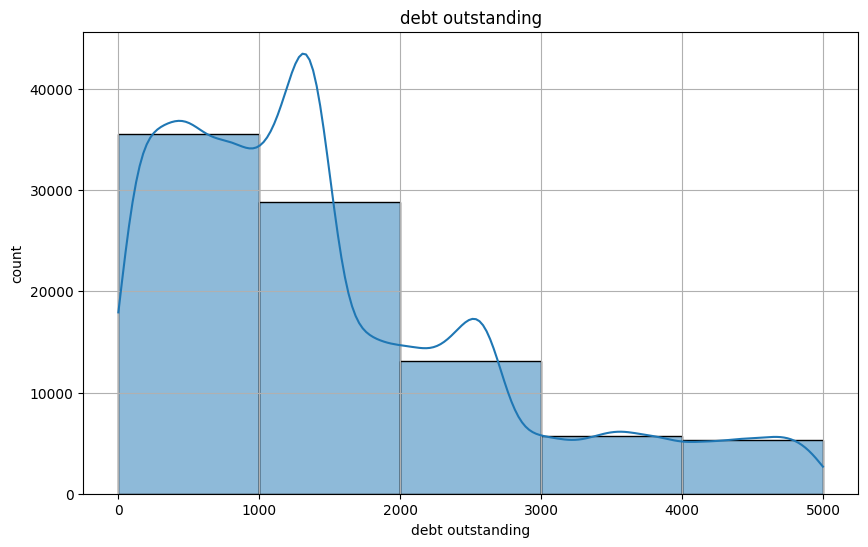

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'income' is your column for income data
# Replace with your actual DataFrame and column name
# For example: df = pd.read_csv('your_data.csv')

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Outstanding_Debt'], kde=True, bins=5)  # kde=True adds a smooth density curve
plt.title('debt outstanding')
plt.xlabel('debt outstanding')
plt.ylabel('count')
plt.grid(True)
plt.show()

In [ ]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
# Ensure Credit_Score is of type string (or you can convert it to a categorical type)
df['Credit_Score'] = df['Credit_Score'].astype('category')

df['Outstanding_Debt'] = pd.cut(df['Outstanding_Debt'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=[0, 1, 2, 3,4])

# Calculate the proportions of credit score categories for each income category
debt_credit_distribution = df.groupby(['Outstanding_Debt', 'Credit_Score']).size().reset_index(name='Count')

# Normalize to get proportions
debt_credit_distribution['Proportion'] = income_credit_distribution.groupby('Outstanding_Debt', observed=True)['Count'].transform(lambda x: x / x.sum())

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Outstanding_Debt', y='Proportion', hue='Credit_Score', data=debt_credit_distribution, hue_order=[0, 1, 2])
plt.title('Proportion of Credit Score Categories by Income Level')
plt.ylabel('Proportion')
plt.xlabel('Income Category')
plt.legend(title='Credit Score')
plt.show()

<ipython-input-78-c9d5419f29f4>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  debt_credit_distribution = df.groupby(['Outstanding_Debt', 'Credit_Score']).size().reset_index(name='Count')


KeyError: 'Outstanding_Debt'

In [ ]:
print(df['Credit_Score'].unique())
print(df['Credit_Score'].dtypes)


In [ ]:
print(df['Credit_Score'].cat.categories)
print(df['Credit_Score'].cat.codes)


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Map the categorical values in Credit_Score to integers
df['Credit_Score'] = df['Credit_Score'].map({'Good': 2, 'Standard': 1, 'Poor': 0})

# Check the result
print(df['Credit_Score'].unique())


[2, 1, 0]
Categories (3, int64): [2, 0, 1]


In [ ]:
df.iloc[10:20]

,Unnamed: 0,Record_ID,Customer_ID,Record_Month,Customer_Age,Customer_SSN,Customer_Occupation,Annual_Income,Monthly_Salary,Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization,Credit_History_Age,Min_Amount_Payment,Monthly_EMI,Monthly_Investment,Payment_Behavior,Monthly_Balance,Credit_Score
10,10,0x1610,CUS_0x21b1,March,28,004-07-5839,13,34847.84,3037.986667,2.0,...,1,0,33.224951,26.750000,0,18.816215,58.515976,0,466.466476,Standard
11,11,0x1611,CUS_0x21b1,April,28,004-07-5839,13,34847.84,3037.986667,2.0,...,1,0,39.182656,26.833333,0,18.816215,99.306228,4,465.676224,Good
12,12,0x1612,CUS_0x21b1,May,28,004-07-5839,13,34847.84,3037.986667,2.0,...,1,0,34.977895,26.916667,0,18.816215,130.115420,5,444.867032,Good
13,13,0x1613,CUS_0x21b1,June,28,004-07-5839,13,34847.84,3037.986667,2.0,...,1,0,33.381010,27.000000,0,18.816215,43.477190,0,481.505262,Good
14,14,0x1614,CUS_0x21b1,July,28,004-07-5839,13,34847.84,3037.986667,2.0,...,1,0,31.131702,27.083333,0,18.816215,70.101774,1,464.880678,Good
15,15,0x1615,CUS_0x21b1,August,28,004-07-5839,13,34847.84,3037.986667,2.0,...,1,0,32.933856,27.166667,0,18.816215,218.904344,5,356.078109,Good
16,16,0x161a,CUS_0x2dbc,January,34,486-85-3974,4,143162.64,12187.220000,1.0,...,1,1,28.616735,17.750000,0,246.992320,168.413703,2,1043.315978,Good
17,17,0x161b,CUS_0x2dbc,February,34,486-85-3974,4,143162.64,12187.220000,1.0,...,1,1,41.702573,17.833333,0,246.992320,232.860384,2,998.869297,Good
18,18,0x161c,CUS_0x2dbc,March,34,486-85-3974,4,143162.64,12187.220000,1.0,...,1,1,26.519815,17.916667,0,246.992320,10000.000000,2,715.741367,Good
19,19,0x161d,CUS_0x2dbc,April,34,486-85-3974,4,143162.64,12187.220000,1.0,...,1,1,39.501648,17.916667,0,246.992320,825.216270,4,426.513411,Good


In [ ]:
# numerical feature scaling

# Initialize the StandardScaler
scaler = StandardScaler()
# List of numerical features to scale
numerical_features = [
    'Annual_Income', 'Monthly_Salary', 'Bank_Accounts', 'Credit_Cards',
    'Interest_Rate', 'Loans', 'Payment_Delay_Days', 'Delayed_Payments',
    'Outstanding_Debt', 'Credit_Utilization', 'Credit_History_Age',
    'Monthly_EMI', 'Monthly_Investment', 'Monthly_Balance', 'Customer_Age'
]

# Apply StandardScaler to the numerical columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])



In [ ]:
df.iloc[100:130]

,Unnamed: 0,Record_ID,Customer_ID,Record_Month,Customer_Age,Customer_SSN,Customer_Occupation,Annual_Income,Monthly_Salary,Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization,Credit_History_Age,Min_Amount_Payment,Monthly_EMI,Monthly_Investment,Payment_Behavior,Monthly_Balance,Credit_Score
100,116,0x16ae,CUS_0xff4,May,37,655-05-7666,Entrepreneur,25546.260,2415.855000,8.0,...,Standard,0,28.277420,18.500000,Yes,101.328637,311.999347,Low_spent_Small_value_payments,118.257515,1
101,117,0x16af,CUS_0xff4,June,37,655-05-7666,Entrepreneur,25546.260,2415.855000,8.0,...,Standard,0,34.586599,18.500000,Yes,101.328637,61.730748,High_spent_Small_value_payments,338.526114,1
102,118,0x16b0,CUS_0xff4,July,37,655-05-7666,Entrepreneur,25546.260,2415.855000,8.0,...,Standard,0,30.099067,18.666667,Yes,101.328637,130.300394,Low_spent_Small_value_payments,299.956469,1
103,119,0x16b1,CUS_0xff4,August,37,655-05-7666,Entrepreneur,25546.260,2415.855000,8.0,...,Standard,0,39.333488,18.750000,Yes,101.328637,189.815861,Low_spent_Medium_value_payments,230.441001,1
104,120,0x16b6,CUS_0x33d2,January,30,965-46-2491,Scientist,31993.780,2942.148333,6.0,...,Standard,0,25.369597,16.833333,Yes,45.141298,81.998835,Low_spent_Medium_value_payments,447.074700,1
105,121,0x16b7,CUS_0x33d2,February,30,965-46-2491,Scientist,31993.780,2942.148333,6.0,...,Standard,0,37.958569,16.916667,Yes,45.141298,10000.000000,Low_spent_Small_value_payments,157.869803,1
106,122,0x16b8,CUS_0x33d2,March,30,965-46-2491,Scientist,31993.780,2942.148333,6.0,...,Standard,0,27.380109,17.000000,Yes,45.141298,264.257089,Low_spent_Small_value_payments,274.816447,1
107,123,0x16b9,CUS_0x33d2,April,30,965-46-2491,Scientist,31993.780,2942.148333,6.0,...,Standard,0,34.158262,17.083333,Yes,45.141298,152.452326,Low_spent_Medium_value_payments,376.621209,1
108,124,0x16ba,CUS_0x33d2,May,30,965-46-2491,Scientist,31993.780,2942.148333,6.0,...,Standard,0,30.788039,17.166667,Yes,45.141298,43.470409,High_spent_Medium_value_payments,455.603126,1
109,125,0x16bb,CUS_0x33d2,June,31,965-46-2491,Scientist,31993.780,2942.148333,6.0,...,Standard,0,34.280969,17.250000,Yes,45.141298,112.723887,High_spent_Small_value_payments,396.349648,1


In [ ]:
from tensorflow.keras.utils import to_categorical
# one hot encoding
#turn categorical with no ranking into numbers

# One-hot encode 'Payment_Behavior' and other categorical columns
df = pd.get_dummies(df, columns=['Payment_Behavior', 'Min_Amount_Payment', 'Customer_Occupation'], drop_first=True)


KeyError: "None of [Index(['Payment_Behavior', 'Min_Amount_Payment', 'Customer_Occupation'], dtype='object')] are in the [columns]"

In [ ]:
#label Encoder
#turn categorical variables with ranking into numbers

from sklearn.preprocessing import LabelEncoder

fit = LabelEncoder()
df['Loan_Types'] = fit.fit_transform(df['Loan_Types'])
df['Credit_Mix'] = fit.fit_transform(df['Credit_Mix'])



In [ ]:
#decision tree classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X = df[['Bank_Accounts', 'Interest_Rate', 'Credit_Cards', 'Outstanding_Debt',
        'Delayed_Payments', 'Payment_Delay_Days', 'Loans', 'Credit_History_Age',
        'Loan_Types', 'Credit_Mix', 'Min_Amount_Payment_Yes',
        'Payment_Behavior_High_spent_Medium_value_payments', 'Payment_Behavior_High_spent_Small_value_payments', 'Payment_Behavior_Low_spent_Large_value_payments',
        'Payment_Behavior_Low_spent_Medium_value_payments', 'Payment_Behavior_Low_spent_Small_value_payments', 'Customer_Occupation_Architect',
        'Customer_Occupation_Developer', 'Customer_Occupation_Doctor', 'Customer_Occupation_Engineer', 'Customer_Occupation_Entrepreneur', 'Customer_Occupation_Journalist',
        'Customer_Occupation_Lawyer', 'Customer_Occupation_Manager', 'Customer_Occupation_Mechanic', 'Customer_Occupation_Media_Manager', 'Customer_Occupation_Musician',
        'Customer_Occupation_Scientist', 'Customer_Occupation_Teacher', 'Customer_Occupation_Writer']].values  # Select features
y = df['Credit_Score'].values  # Target variable


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the classifier performance
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5565
           1       0.79      0.79      0.79      9279
           2       0.74      0.73      0.74      2875

    accuracy                           0.78     17719
   macro avg       0.77      0.77      0.77     17719
weighted avg       0.78      0.78      0.78     17719



In [ ]:
# Optional: Plot the Decision Tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=['Bank_Accounts', 'Interest_Rate', 'Credit_Cards', 'Outstanding_Debt',
        'Delayed_Payments', 'Payment_Delay_Days', 'Loans', 'Credit_History_Age',
        'Loan_Types', 'Credit_Mix', 'Min_Amount_Payment_Yes',
        'Payment_Behavior_High_spent_Medium_value_payments', 'Payment_Behavior_High_spent_Small_value_payments', 'Payment_Behavior_Low_spent_Large_value_payments',
        'Payment_Behavior_Low_spent_Medium_value_payments', 'Payment_Behavior_Low_spent_Small_value_payments', 'Customer_Occupation_Architect',
        'Customer_Occupation_Developer', 'Customer_Occupation_Doctor', 'Customer_Occupation_Engineer', 'Customer_Occupation_Entrepreneur', 'Customer_Occupation_Journalist',
        'Customer_Occupation_Lawyer', 'Customer_Occupation_Manager', 'Customer_Occupation_Mechanic', 'Customer_Occupation_Media_Manager', 'Customer_Occupation_Musician',
        'Customer_Occupation_Scientist', 'Customer_Occupation_Teacher', 'Customer_Occupation_Writer'], class_names=['Poor', 'Standard', 'Good'])
plt.show()

KeyboardInterrupt: 

In [ ]:
#Random Forest

In [ ]:
print(df.columns.tolist())


['Unnamed: 0', 'Record_ID', 'Customer_ID', 'Record_Month', 'Customer_Age', 'Customer_SSN', 'Annual_Income', 'Monthly_Salary', 'Bank_Accounts', 'Credit_Cards', 'Interest_Rate', 'Loans', 'Loan_Types', 'Extra_Column_1', 'Extra_Column_2', 'Extra_Column_3', 'Payment_Delay_Days', 'Delayed_Payments', 'Credit_Limit_Changes', 'Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization', 'Credit_History_Age', 'Monthly_EMI', 'Monthly_Investment', 'Monthly_Balance', 'Credit_Score', 'Payment_Behavior_High_spent_Medium_value_payments', 'Payment_Behavior_High_spent_Small_value_payments', 'Payment_Behavior_Low_spent_Large_value_payments', 'Payment_Behavior_Low_spent_Medium_value_payments', 'Payment_Behavior_Low_spent_Small_value_payments', 'Min_Amount_Payment_Yes', 'Customer_Occupation_Architect', 'Customer_Occupation_Developer', 'Customer_Occupation_Doctor', 'Customer_Occupation_Engineer', 'Customer_Occupation_Entrepreneur', 'Customer_Occupation_Journalist', 'Customer_Occupation_Lawyer'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[['Bank_Accounts', 'Interest_Rate', 'Credit_Cards', 'Outstanding_Debt',
        'Delayed_Payments', 'Payment_Delay_Days', 'Loans', 'Credit_History_Age',
        'Loan_Types', 'Credit_Mix', 'Min_Amount_Payment_Yes', 'Monthly_Salary', 'Customer_Age',
        'Payment_Behavior_High_spent_Medium_value_payments', 'Payment_Behavior_High_spent_Small_value_payments', 'Payment_Behavior_Low_spent_Large_value_payments',
        'Payment_Behavior_Low_spent_Medium_value_payments', 'Payment_Behavior_Low_spent_Small_value_payments', 'Customer_Occupation_Architect',
        'Customer_Occupation_Developer', 'Customer_Occupation_Doctor', 'Customer_Occupation_Engineer', 'Customer_Occupation_Entrepreneur', 'Customer_Occupation_Journalist',
        'Customer_Occupation_Lawyer', 'Customer_Occupation_Manager', 'Customer_Occupation_Mechanic', 'Customer_Occupation_Media_Manager', 'Customer_Occupation_Musician',
        'Customer_Occupation_Scientist', 'Customer_Occupation_Teacher', 'Customer_Occupation_Writer']].values  # Select features
y = df['Credit_Score'].values  # Target variable

# Step 1: First, split the data into train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the temp data into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have 80% train, 10% validation, and 10% test sets

model = RandomForestClassifier(n_estimators=3000, class_weight='balanced')

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=3000)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8128668171557563


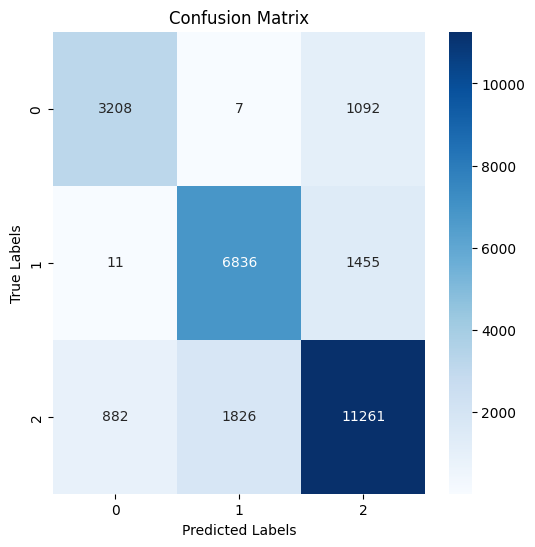

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print('Classification Report', classification_report(y_test, y_pred))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, y_pred))
print('\n')


Classification Report               precision    recall  f1-score   support

           0       0.79      0.76      0.78      2135
           1       0.80      0.84      0.82      4232
           2       0.82      0.81      0.82      6922

    accuracy                           0.81     13289
   macro avg       0.80      0.80      0.80     13289
weighted avg       0.81      0.81      0.81     13289



Confusion Matrix [[1632    2  501]
 [   3 3539  690]
 [ 429  889 5604]]




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [25, 50, 100, 200, 300],  # Number of trees
    'max_depth': [5, 10, 20, 30, None],            # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],            # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],           # Maximum number of features to consider for a split
    'bootstrap': [True, False]                  # Whether to use bootstrap samples
}

# Use RandomizedSearchCV for random search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=200, cv=5, verbose=2, random_state=42)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters found
print("Best hyperparameters: ", random_search.best_params_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=25; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; to

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}


In [ ]:
# optimal model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with the best hyperparameters
best_model = RandomForestClassifier(
    n_estimators=200,              # Number of trees
    min_samples_split=5,           # Minimum samples to split a node
    min_samples_leaf=1,            # Minimum samples at a leaf node
    max_features='log2',           # Number of features to consider for the best split
    max_depth=30,                  # Maximum depth of the trees
    bootstrap=True,                # Use bootstrap samples
    random_state=42,                # Set a seed for reproducibility
    class_weight='balanced'
)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8207674943566592
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      2833
           1       0.87      0.78      0.82      4597
           2       0.75      0.84      0.79      1430

    accuracy                           0.82      8860
   macro avg       0.80      0.83      0.82      8860
weighted avg       0.83      0.82      0.82      8860



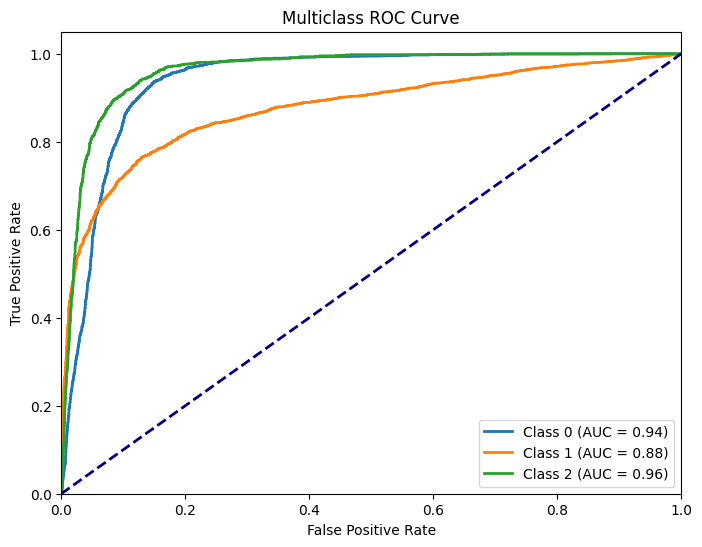

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output classes
n_classes = len(best_model.classes_)  # Assuming you have more than 2 classes
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# Predict probabilities for each class
y_prob = best_model.predict_proba(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
# Calculate precision, recall, and thresholds for the Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


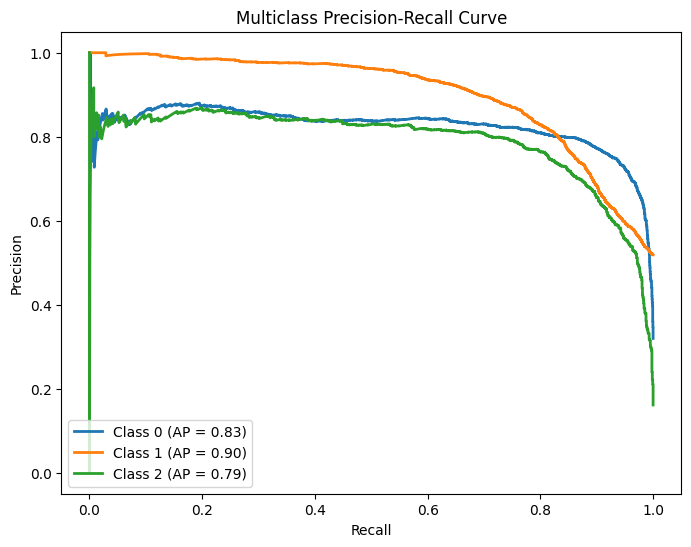

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = dict()
recall = dict()
average_precision = dict()

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

# Plot Precision-Recall curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [ ]:
# with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the RandomForestClassifier with the best hyperparameters
best_model = RandomForestClassifier(
    n_estimators=200,              # Number of trees
    min_samples_split=5,           # Minimum samples to split a node
    min_samples_leaf=1,            # Minimum samples at a leaf node
    max_features='log2',           # Number of features to consider for the best split
    max_depth=30,                  # Maximum depth of the trees
    bootstrap=True,                # Use bootstrap samples
    random_state=42                # Set a seed for reproducibility
)

# Fit the model to the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set (no need to apply SMOTE here)
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8127539503386004
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      2833
           1       0.84      0.79      0.82      4597
           2       0.76      0.79      0.78      1430

    accuracy                           0.81      8860
   macro avg       0.80      0.81      0.81      8860
weighted avg       0.81      0.81      0.81      8860



In [ ]:
#Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


X = df[['Bank_Accounts', 'Interest_Rate', 'Credit_Cards', 'Outstanding_Debt',
        'Delayed_Payments', 'Payment_Delay_Days', 'Loans', 'Credit_History_Age',
        'Customer_Occupation', 'Loan_Types', 'Credit_Mix', 'Min_Amount_Payment',
        'Payment_Behavior']].values  # Select features
y = df['Credit_Score'].values  # Target variable

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Initialize the ExtraTreesClassifier with 2000 trees and bootstrap enabled
ETC = ExtraTreesClassifier(n_estimators=3000, bootstrap=True, random_state=42)

# Step 7: Train the model
ETC.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = ETC.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8016
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      4307
           1       0.79      0.82      0.81      8302
           2       0.82      0.81      0.81     13969

    accuracy                           0.80     26578
   macro avg       0.80      0.79      0.79     26578
weighted avg       0.80      0.80      0.80     26578



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Step 1: Initialize SMOTE and resample the dataset
X = df[['Bank_Accounts', 'Interest_Rate', 'Credit_Cards', 'Outstanding_Debt',
        'Delayed_Payments', 'Payment_Delay_Days', 'Loans', 'Credit_History_Age']].values
y = df['Credit_Score'].values

SMT = SMOTE()
x_SMT, y_SMT = SMT.fit_resample(X, y)

# Step 2: Split the resampled dataset into training and testing sets
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.15, random_state=42)

# Step 3: Train a classifier (e.g., ExtraTreesClassifier)
clf = ExtraTreesClassifier(n_estimators=2000, bootstrap=True, random_state=42)
clf.fit(x_train_smote, y_train_smote)

# Step 4: Make predictions
y_pred = clf.predict(x_test_smote)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test_smote, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test_smote, y_pred))


In [ ]:
#logistic regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X = df[['Bank_Accounts', 'Interest_Rate', 'Credit_Cards', 'Outstanding_Debt',
        'Delayed_Payments', 'Payment_Delay_Days', 'Loans', 'Credit_History_Age',
        'Customer_Occupation', 'Loan_Types', 'Credit_Mix', 'Min_Amount_Payment',
        'Payment_Behavior',]].values  # Select features
y = df['Credit_Score'].values # Use dummy columns for multiclass

#The .values attribute in pandas is used to convert a DataFrame or a Series into a NumPy array.
#It extracts the underlying data without the index or column labels, providing a raw array of values.

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression modelx
model = LogisticRegression(solver='lbfgs', max_iter = 3000, C=100, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.57      0.53      0.55      2895
        Poor       0.60      0.51      0.55      5512
    Standard       0.64      0.71      0.67      9311

    accuracy                           0.62     17718
   macro avg       0.60      0.58      0.59     17718
weighted avg       0.62      0.62      0.61     17718



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# Logistic Regression model
model = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs')

# Hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'C': uniform(0.01, 100),  # Regularization parameter
    'max_iter': [1000, 2000, 3000],  # Number of iterations
    'penalty': ['l2']  # Regularization type (l2 regularization)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Metric to optimize
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=1
)

X = df[['Bank_Accounts', 'Interest_Rate', 'Credit_Cards', 'Outstanding_Debt',
        'Delayed_Payments', 'Payment_Delay_Days', 'Loans', 'Credit_History_Age',
        'Customer_Occupation', 'Loan_Types', 'Credit_Mix', 'Min_Amount_Payment',
        'Payment_Behavior',]].values  # Select features
y = df['Credit_Score'].values # Use dummy columns for multiclass

#The .values attribute in pandas is used to convert a DataFrame or a Series into a NumPy array.
#It extracts the underlying data without the index or column labels, providing a raw array of values.

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Make predictions with the best model
y_pred = random_search.best_estimator_.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

Best hyperparameters: {'C': 6.515159298527951, 'max_iter': 1000, 'penalty': 'l2'}
              precision    recall  f1-score   support

        Good       0.57      0.53      0.55      2895
        Poor       0.60      0.51      0.55      5512
    Standard       0.64      0.71      0.67      9311

    accuracy                           0.62     17718
   macro avg       0.60      0.58      0.59     17718
weighted avg       0.62      0.62      0.61     17718



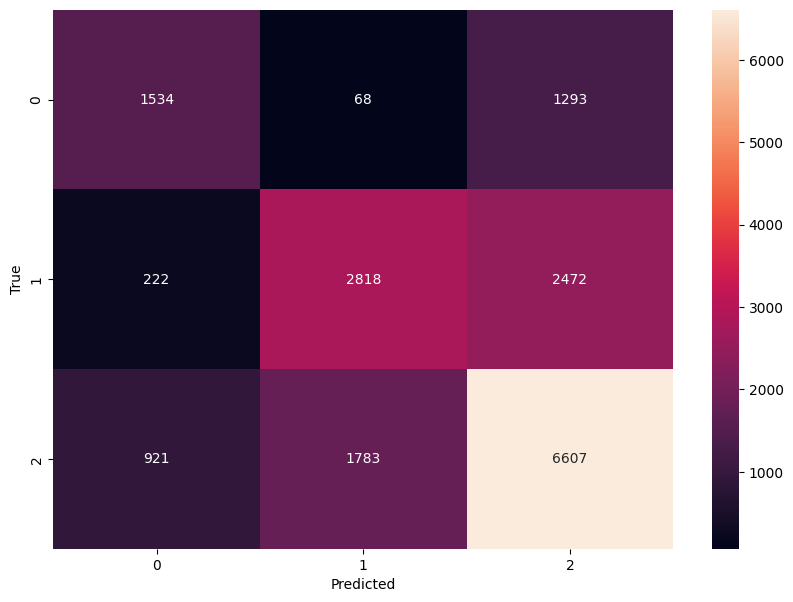

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix

plt.figure(figsize=(10, 7))

sns.heatmap(cm, fmt="d", annot=True)

plt.xlabel('Predicted')

plt.ylabel('True')

plt.show()

